In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coffee_production = pd.read_csv("../Data/coffee/total-production.csv").T
coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.drop('total_production')
coffee_production.tail()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
2014,39.405,99.8766,53304.7669,247.55,644.0112,10946.2773,501.4544,24.7098,797.5642,20.0725,...,106.2169,46.4478,35.7018,844.8871,143.2417,12.0013,3744.477,650.3983,26499.8404,178.3814
2015,40.515,84.2191,52870.5876,274.1017,644.4926,12585.4751,425.2061,21.2015,711.9818,20.0,...,127.0784,45.9276,36.1933,761.9808,80.9232,11.7897,3649.567,500.1259,28736.5941,156.246
2016,44.83,77.9835,56788.1784,248.7933,644.8845,11541.0266,420.8227,19.516,1171.1449,20.0101,...,120.1902,37.9217,36.7161,537.5435,23.2772,11.7911,4962.158,525.0,25540.2932,143.4533
2017,35.006,83.8112,52739.8635,202.1079,623.5744,10852.3153,408.7848,14.4703,733.9382,20.0024,...,104.5621,37.9464,36.7829,638.2325,114.7158,12.0009,4596.813,571.5128,27887.6555,132.1281
2018,40.3874,82.5687,62924.8836,178.4206,601.0001,9417.5942,396.3764,12.8493,930.369,20.0135,...,130.3021,30.9901,36.0659,482.0069,74.3319,12.3647,4703.964,525.2602,31174.0742,106.0735


In [3]:
top10_producers = coffee_production.sum().sort_values(ascending = False).iloc[:10]
top10_producers

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
India          132025.681
Mexico        126908.2467
Guatemala     113401.0702
Honduras      105456.5888
Uganda          93146.369
dtype: object

# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. Change the xticks to two letter country abbreviations.


* Data Prep Code

<mark style="background-color: #000000"> coffee_production = pd.read_csv("coffee/total-production.csv").T </mark> 

<mark style="background-color: #000000"> coffee_production.columns = coffee_production.iloc[0] </mark> 

<mark style="background-color: #000000"> coffee_production = coffee_production.drop("total_production") </mark> 


''

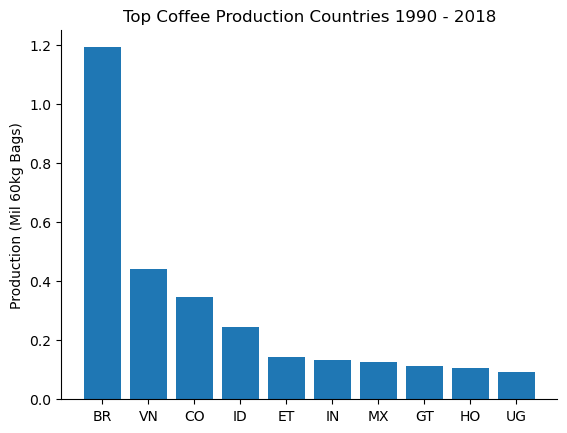

In [4]:
fig, ax = plt.subplots()
labels = ['BR', 'VN', 'CO', "ID", 'ET', 'IN', "MX", 'GT', 'HO', 'UG']
ax.bar(labels, height = top10_producers / 1000000)
ax.set_title("Top Coffee Production Countries 1990 - 2018")
ax.set_ylabel("Production (Mil 60kg Bags)", fontsize = 10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
;

# Top 5 over time

* Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns].

In [5]:
top5 =coffee_production.loc[:, ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']]
top5.index = top5.index.astype('datetime64[ns]')
top5.index = top5.index.year

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990,27285.6286,1310.288,14396.0,7441.383,2909.451
1991,27293.4934,1437.848,17980.397,8493.196,2924.664
1992,34603.3542,2340.447,14946.878,5569.478,1825.171
1993,28166.9786,3020.216,11422.422,6743.288,2967.004
1994,28192.047,3631.609,12964.0,5367.878,2762.73


''

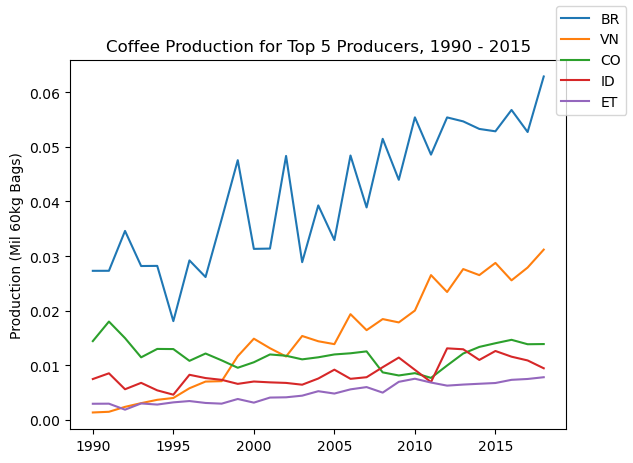

In [6]:
fig, ax = plt.subplots()

labels = ['BR', 'VN', 'CO', "ID", 'ET']
ax.plot(top5 / 1000000)
fig.legend(labels)
ax.set_title("Coffee Production for Top 5 Producers, 1990 - 2015")
ax.set_ylabel("Cumulative Production (Mil 60kg Bags", fontsize = 10)

ax.set_ylabel("Production (Mil 60kg Bags)", fontsize = 10)
;

# COMPOSITION OVER TIME

Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

Build a plot that global total production as well as Brazil's contribution to global production over time.

In [18]:
brazil_vs_others = coffee_production
brazil_vs_others['Global Production'] = coffee_production.sum(axis=1)
brazil_vs_others.drop(brazil_vs_others.iloc[:, np.r_[0:2, 3:56]], axis = 1)



total_production,Brazil,Global Production
1990,27285.6286,93230.0596
1991,27293.4934,101266.6844
1992,34603.3542,98525.8992
1993,28166.9786,91764.6216
1994,28192.047,93313.1940
1995,18060.2022,87317.4582
1996,29196.743,103302.5960
1997,26148.004,99861.1990
1998,36760.8533,108892.2131
1999,47577.8065,131383.7967


In [8]:
brazil_vs_others.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


## PRODUCTION RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [9]:
coffee_production_top5_2018

NameError: name 'coffee_production_top5_2018' is not defined

In [ ]:


brazil_vs_others.head()

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plot a dual axis bar chart of price vs consumption totals for these countries.

In [ ]:
consumption = pd.read_csv("coffee/imports.csv")


consumption.head()

In [ ]:
prices = pd.read_csv("coffee/retail-prices.csv")

prices.head()

In [ ]:
prices.head()

In [ ]:
price_cons